<a href="https://colab.research.google.com/github/dayoungkimm/MS-AI-School/blob/main/Python_10_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas import Series, DataFrame      #판다스에서 두가지 모듈 동시에 가져오기/ import * 전체 가져오기

###1. Series

In [3]:
Series([2500,3800,1200,6000], index = ['apple', 'banana', 'peer', 'cherry'])

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [4]:
fruit = Series([2500,3800,1200,6000], index=['apple', 'banana', 'peer', 'cherry'])
fruit

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [5]:
print(fruit.values)
print(fruit.index)

[2500 3800 1200 6000]
Index(['apple', 'banana', 'peer', 'cherry'], dtype='object')


1. Dict 객체를 이용해서 Series 객체를 생성하는 방법

In [6]:
fruitData = {'apple': 2500, 'banana':3800, 'peer': 1200, 'cherry': 6000}
print(type(fruitData))
fruit = Series(fruitData)       # Dic객체를 Series객체로 변환
print(type(fruit))
print(fruit)

<class 'dict'>
<class 'pandas.core.series.Series'>
apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64


In [7]:
# 이름을 지어보기
fruit.name = 'fruitPrice'
print(fruit)

apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64


In [8]:
#색인(컬럼) 이름을 지어보기
fruit.index.name = 'fruitName'
print(fruit)

fruitName
apple     2500
banana    3800
peer      1200
cherry    6000
Name: fruitPrice, dtype: int64


###2. DataFrame
DataFrame 객체 >> Series 객체가 여러개 묶여서 만들어진다.

In [9]:
fruitData = {'fruitName': ['apple', 'banana', 'cherry', 'peer'],
            'fruitPrice': [2500,3800,6000,1200],
            'num':[10,5,3,8]
            }

In [10]:
DataFrame(fruitData)

,fruitName,fruitPrice,num
0,apple,2500,10
1,banana,3800,5
2,cherry,6000,3
3,peer,1200,8


In [11]:
#컬럼 순서 지정하기
fruitFrame = DataFrame(fruitData, columns=['fruitPrice', 'num', 'fruitName'])
fruitFrame

,fruitPrice,num,fruitName
0,2500,10,apple
1,3800,5,banana
2,6000,3,cherry
3,1200,8,peer


1. 특정 컬럼만 추출해서 표현하기

In [13]:
# 컬럼방식
fruitFrame['fruitName']

0     apple
1    banana
2    cherry
3      peer
Name: fruitName, dtype: object

In [14]:
# 속성방식
fruitFrame.fruitName      #DataFrame내의 Series를 속성처럼 지정하여 불러내는방식

0     apple
1    banana
2    cherry
3      peer
Name: fruitName, dtype: object

In [15]:
fruitFrame['Year'] = 2023   #존재하지 않는 컬럼을 인덱스할 경우 컬럼이 새로 추가됨
fruitFrame

,fruitPrice,num,fruitName,Year
0,2500,10,apple,2023
1,3800,5,banana,2023
2,6000,3,cherry,2023
3,1200,8,peer,2023


2. index 지정해주기

In [16]:
variable = Series([4,2,1], index=[0,2,3])       #index에 1이 빠짐
fruitFrame['stock'] = variable
fruitFrame

,fruitPrice,num,fruitName,Year,stock
0,2500,10,apple,2023,4.0
1,3800,5,banana,2023,NaN
2,6000,3,cherry,2023,2.0
3,1200,8,peer,2023,1.0


3. 데이터 구조에서 항목 삭제하는 방법

In [17]:
fruit = Series([2500,3800,1200,6000], index=['apple', 'banana', 'peer', 'cherry'])

In [18]:
new_fruit = fruit.drop('banana')        #원하는 항목 삭제 but 실제로 원본에서 삭제되지는 않고 삭제된 결과를 보여줌
new_fruit

apple     2500
peer      1200
cherry    6000
dtype: int64

In [19]:
fruit                                 #원본에서는 바나나 삭제되지 않음

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

4. fruitName을 인덱스로 표현하기

In [20]:
fruitData

{'fruitName': ['apple', 'banana', 'cherry', 'peer'],
 'fruitPrice': [2500, 3800, 6000, 1200],
 'num': [10, 5, 3, 8]}

In [21]:
fruitData['fruitName']

['apple', 'banana', 'cherry', 'peer']

In [22]:
fruitFrame = DataFrame(fruitData, index = fruitData['fruitName'], columns =['fruitPrice','num'])

In [23]:
fruitFrame

,fruitPrice,num
apple,2500,10
banana,3800,5
cherry,6000,3
peer,1200,8


In [24]:
#원하는 항목 빼기(원본에서 삭제되는 것이 아님!)>> 새로 fruitFrame2 등으로 지정해서 사용하기
fruitFrame.drop(['apple','cherry'])

,fruitPrice,num
banana,3800,5
peer,1200,8


In [25]:
fruitFrame2 = fruitFrame.drop(['apple', 'cherry'])
fruitFrame2

,fruitPrice,num
banana,3800,5
peer,1200,8


5. drop은 가로축 기준 (디폴트 값)

In [26]:
fruitFrame.drop('num', axis=1)    #세로로 보라고 축 바꿔주기

,fruitPrice
apple,2500
banana,3800
cherry,6000
peer,1200


###3. DataFrame 슬라이싱

In [27]:
fruitFrame[:]

,fruitPrice,num
apple,2500,10
banana,3800,5
cherry,6000,3
peer,1200,8


In [28]:
fruitFrame['banana':]

,fruitPrice,num
banana,3800,5
cherry,6000,3
peer,1200,8


In [29]:
fruitFrame['banana':'cherry']       #숫자로 했을때는 숫자 바로 앞까지, 문자로 했을 때는 문자포함까지

,fruitPrice,num
banana,3800,5
cherry,6000,3


###4. 데이터의 기본 연산

In [30]:
fruit1 = Series([5,9,10,3], index = ['apple', 'banana', 'cherry', 'peer'])
fruit2 = Series([3,2,9,5,10], index=['apple','orange', 'banana', 'cherry', 'mango'])

In [31]:
fruit1 + fruit2       #겹치는 부분만 연산되어서 나옴 / 겹치지 않는 부분은 Null값

apple      8.0
banana    18.0
cherry    15.0
mango      NaN
orange     NaN
peer       NaN
dtype: float64

In [32]:
fruitData1 = {'Ohio': [4,8,3,5], 'Texas': [0,1,2,3]}
fruitData2 = {'Ohio': [3,0,2,1,7], 'Colorado': [5,4,3,6,0]}
fruitFrame1 = DataFrame(fruitData1, columns = ['Ohio','Texas'], index = ['apple', 'banana', 'cherry','peer'])
fruitFrame1
#fruitFrame2

,Ohio,Texas
apple,4,0
banana,8,1
cherry,3,2
peer,5,3


In [34]:
fruitFrame2= DataFrame(fruitData2, columns = ['Ohio', 'Colorado'], index = ['apple','orange', 'banana', 'cherry', 'mango'])
fruitFrame2

,Ohio,Colorado
apple,3,5
orange,0,4
banana,2,3
cherry,1,6
mango,7,0


In [35]:
fruitFrame1 + fruitFrame2     #일치하는 부분만 연산됨/일치하지 않는 부분은 Null값으로 표현됨

,Colorado,Ohio,Texas
apple,NaN,7.0,NaN
banana,NaN,10.0,NaN
cherry,NaN,4.0,NaN
mango,NaN,NaN,NaN
orange,NaN,NaN,NaN
peer,NaN,NaN,NaN


###5. 데이터의 정렬

In [36]:
fruit = Series([2500,3800,1200,6000],
               index=['apple','banana','peer','cherry'])
fruit

apple     2500
banana    3800
peer      1200
cherry    6000
dtype: int64

In [37]:
fruit.sort_values()

peer      1200
apple     2500
banana    3800
cherry    6000
dtype: int64

In [38]:
fruit.sort_values(ascending=True) #내림차순으로 정렬

peer      1200
apple     2500
banana    3800
cherry    6000
dtype: int64

In [39]:
fruit.sort_values(ascending=False)#역순으로 정렬

cherry    6000
banana    3800
apple     2500
peer      1200
dtype: int64

###6. DataFrame 객체의 정렬

In [40]:
fruitData

{'fruitName': ['apple', 'banana', 'cherry', 'peer'],
 'fruitPrice': [2500, 3800, 6000, 1200],
 'num': [10, 5, 3, 8]}

In [41]:
fruitName = fruitData['fruitName']

fruitFrame= DataFrame(fruitData, index = fruitName, columns =['num','fruitPrice'])
fruitFrame

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,3,6000
peer,8,1200


In [42]:
fruitFrame.sort_index()

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,3,6000
peer,8,1200


In [43]:
fruitFrame.sort_index(ascending=False) #index의 역순 정렬

,num,fruitPrice
peer,8,1200
cherry,3,6000
banana,5,3800
apple,10,2500


In [44]:
fruitFrame.sort_values(by = ['fruitPrice'])

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


In [45]:
fruitFrame.sort_values(by = ['fruitPrice', 'num'])      #fruitPrice 중 값이 같을 경우에는 두번째 조건 num으로 넘어가서 정렬

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


In [46]:
fruitFrame.sort_values(by = ['fruitPrice','num'], ascending=[True,False]) #각각도 지정가능

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


###7. 기초분석(기술 통계량)
1. count: NA를 제외한 개수 </br>
2. min, max:  최소, 최대값 </br>
3. sum:  합 </br>
4. comprod: 누적합</br>
5. mean :평균 </br>
6. median : 중앙값 </br>
7. quantile : 분위수 </br>
8. var :표본분산 </br>
9. std : 표본 정규분산</br>
10. describe : 요약 통계량 </br>


###8. 예제

In [47]:
pd.read_csv('http://freakonometrics.free.fr/german_credit.csv')     #csv파일 읽어들이기

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [48]:
german_sample=pd.read_csv('http://freakonometrics.free.fr/german_credit.csv') 
type(german_sample)

pandas.core.frame.DataFrame

In [49]:
german_sample.columns.values        #column값들만 확인하기

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [50]:
list(german_sample.columns.values)    #리스트 형태로 출력하기

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [51]:
#특정 컬럼만 뽑아서 확인하기
german = german_sample[['Creditability', 'Duration of Credit (month)', 'Purpose','Credit Amount']]
german

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171
...,...,...,...,...
995,0,24,3,1987
996,0,24,0,2303
997,0,21,0,12680
998,0,12,3,6468


In [53]:
print(german.min())         #각 컬럼들 중 최소값
print(german.max())         #각 컬럼들 중 최대값
print(german.mean())        #각 컬럼값들의 평균값

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64
Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64
Creditability                    0.700
Duration of Credit (month)      20.903
Purpose                          2.828
Credit Amount                 3271.248
dtype: float64


In [54]:
german.describe         #전체 데이터 살짝 맛보기 (속성)

<bound method NDFrame.describe of      Creditability  Duration of Credit (month)  Purpose  Credit Amount
0                1                          18        2           1049
1                1                           9        0           2799
2                1                          12        9            841
3                1                          12        0           2122
4                1                          12        0           2171
..             ...                         ...      ...            ...
995              0                          24        3           1987
996              0                          24        0           2303
997              0                          21        0          12680
998              0                          12        3           6468
999              0                          30        2           6350

[1000 rows x 4 columns]>

In [55]:
german.describe()         #함수로 표기

,Creditability,Duration of Credit (month),Purpose,Credit Amount
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.700000,20.903000,2.828000,3271.24800
std,0.458487,12.058814,2.744439,2822.75176
min,0.000000,4.000000,0.000000,250.00000
25%,0.000000,12.000000,1.000000,1365.50000
50%,1.000000,18.000000,2.000000,2319.50000
75%,1.000000,24.000000,3.000000,3972.25000
max,1.000000,72.000000,10.000000,18424.00000


상관관계

In [56]:
german = german_sample[['Duration of Credit (month)',
                       'Credit Amount',
                       'Age (years)']]
german

,Duration of Credit (month),Credit Amount,Age (years)
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


In [57]:
german.head()         #앞쪽 5개 데이터만 먼저 보여줌

,Duration of Credit (month),Credit Amount,Age (years)
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [58]:
german.corr()           #correlation(엑셀 상관관계 함수) 메서드
#파이썬에서는 엑셀과 달리 매일 새로운 데이터 업데이트된것을 자동화 처리가 가능

,Duration of Credit (month),Credit Amount,Age (years)
Duration of Credit (month),1.000000,0.624988,-0.037550
Credit Amount,0.624988,1.000000,0.032273
Age (years),-0.037550,0.032273,1.000000


###9. 핵심기능 Group By

In [59]:
german = german_sample[['Credit Amount', 'Type of apartment']]
german.head()

,Credit Amount,Type of apartment
0,1049,1
1,2799,1
2,841,1
3,2122,1
4,2171,2


In [61]:
german['Credit Amount'].groupby(german['Type of apartment'])

In [63]:
german_grouped = german['Credit Amount'].groupby(german['Type of apartment'])

In [64]:
german_grouped.mean()

Type of apartment
1    3122.553073
2    3067.257703
3    4881.205607
Name: Credit Amount, dtype: float64

In [65]:
german = german_sample[['Credit Amount', 'Type of apartment','Purpose']]
german.head()

,Credit Amount,Type of apartment,Purpose
0,1049,1,2
1,2799,1,0
2,841,1,9
3,2122,1,0
4,2171,2,0


In [66]:
german_group2 = german['Credit Amount'].groupby([german['Purpose'], german['Type of apartment']])      #groupby내는 리스트타입으로!
german_group2.mean()

Purpose  Type of apartment
0        1                    2597.225000
         2                    2811.024242
         3                    5138.689655
1        1                    5037.086957
         2                    4915.222222
         3                    6609.923077
2        1                    2727.354167
         2                    3107.450820
         3                    4100.181818
3        1                    2199.763158
         2                    2540.533040
         3                    2417.333333
4        1                    1255.500000
         2                    1546.500000
5        1                    1522.000000
         2                    2866.000000
         3                    2750.666667
6        1                    3156.444444
         2                    2492.423077
         3                    4387.266667
8        1                     902.000000
         2                    1243.875000
9        1                    5614.125000
       

**groupby for문 이용**

In [67]:
german = german_sample[['Type of apartment', 'Sex & Marital Status', 'Credit Amount']]

for g in german.groupby('Type of apartment'):
  print(g)

(1,      Type of apartment  Sex & Marital Status  Credit Amount
0                    1                     2           1049
1                    1                     3           2799
2                    1                     2            841
3                    1                     3           2122
5                    1                     3           2241
..                 ...                   ...            ...
983                  1                     2           1882
989                  1                     2           2718
993                  1                     2           3966
994                  1                     3           6199
995                  1                     3           1987

[179 rows x 3 columns])
(2,      Type of apartment  Sex & Marital Status  Credit Amount
4                    2                     3           2171
6                    2                     3           3398
7                    2                     3           1361
8      

In [68]:
for g in german.groupby('Type of apartment'):
  print(g)
  print('----------------------------------')

(1,      Type of apartment  Sex & Marital Status  Credit Amount
0                    1                     2           1049
1                    1                     3           2799
2                    1                     2            841
3                    1                     3           2122
5                    1                     3           2241
..                 ...                   ...            ...
983                  1                     2           1882
989                  1                     2           2718
993                  1                     2           3966
994                  1                     3           6199
995                  1                     3           1987

[179 rows x 3 columns])
----------------------------------
(2,      Type of apartment  Sex & Marital Status  Credit Amount
4                    2                     3           2171
6                    2                     3           3398
7                    2          

In [69]:
for type, g in german.groupby('Type of apartment'): #head보기 위해서는 type으로 빼줘야함
  print(g.head())     #앞 5개 정보만
  print('----------------------------------')

   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
3                  1                     3           2122
5                  1                     3           2241
----------------------------------
    Type of apartment  Sex & Marital Status  Credit Amount
4                   2                     3           2171
6                   2                     3           3398
7                   2                     3           1361
8                   2                     2           1098
12                  2                     2           1957
----------------------------------
     Type of apartment  Sex & Marital Status  Credit Amount
29                   3                     3           4796
44                   3                     3           1239
69                   3                     3    

In [70]:
for type, g in german.groupby('Type of apartment'): #head보기 위해서는 type으로 빼줘야함/ 실제 내용 g가지고만 head봐야함
  print(g.head(n=3))     #앞 3개 정보만
  print('----------------------------------')

   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
----------------------------------
   Type of apartment  Sex & Marital Status  Credit Amount
4                  2                     3           2171
6                  2                     3           3398
7                  2                     3           1361
----------------------------------
    Type of apartment  Sex & Marital Status  Credit Amount
29                  3                     3           4796
44                  3                     3           1239
69                  3                     3           2032
----------------------------------


###10. 예제

In [72]:
import seaborn as sns
planets = sns.load_dataset('planets')     #모듈 데이터 가져오기

In [73]:
planets.shape             #습관적으로 shape 명령줘서 데이터 형태,구조 확인 (개수, 컬럼 개수)

(1035, 6)

In [74]:
planets.head()            #데이터 들여다보기

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [75]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


**NaN 값 제거**

In [76]:
planets.dropna() 

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


데이터 개수가 부족하여 모든 NaN겂 제거하기 아까울때:
1. 평균값으로 넣어준다.
2. 1)0으로 채운다 </br> 2) 보상값을 준다

In [77]:
planets.dropna().describe()   #NaN값 제거 후 요약
#이 데이터가 쓸만한지 확인위해서는 NaN값 제거 후 describe()로 요약보면서 유효성 체크하기

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


###11. 데이터 시각화 예제

In [78]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [79]:
births['year']

0        1969
1        1969
2        1969
3        1969
4        1969
         ... 
15542    2008
15543    2008
15544    2008
15545    2008
15546    2008
Name: year, Length: 15547, dtype: int64

In [80]:
births['year'] // 10 * 10     #//두개는 나머지 버리는 것 >> 연대 :// 두번 *

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: year, Length: 15547, dtype: int64

In [81]:
#연대 항목 추가하기
births['decade'] = births['year']//10*10
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


**데이터를 피봇테이블로 분류**

In [82]:
births.pivot_table('births', index = 'decade', columns ='gender', aggfunc ='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


**피봇테이블을 그림으로 표현하기**

<Axes: xlabel='decade'>

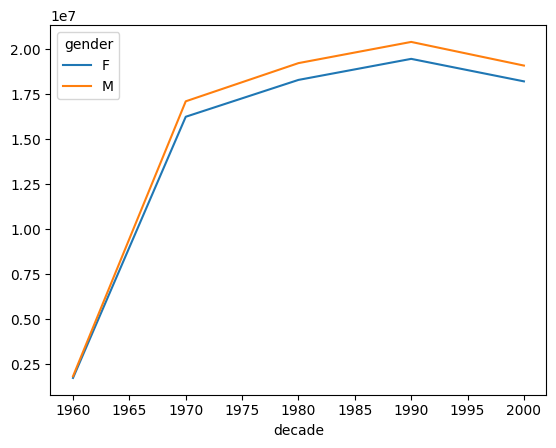

In [83]:
births.pivot_table('births', index = 'decade', columns ='gender', aggfunc ='sum').plot()

<Axes: xlabel='year'>

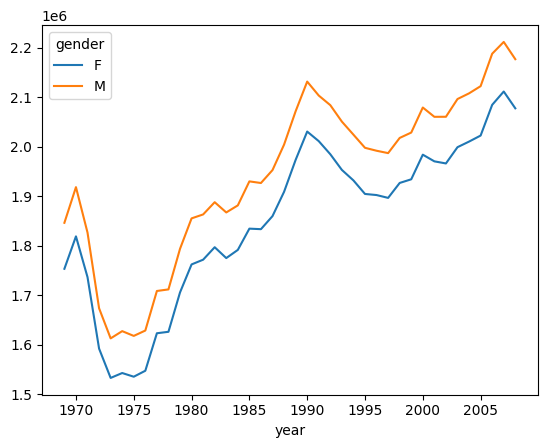

In [84]:
births.pivot_table('births',index = 'year', columns='gender', aggfunc ='sum').plot()